In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
%matplotlib inline
import missingno # library used to visualize missing values
import seaborn as sns
import plotly
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.shape

(8807, 12)

In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing Values / Nilai yang hilang

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

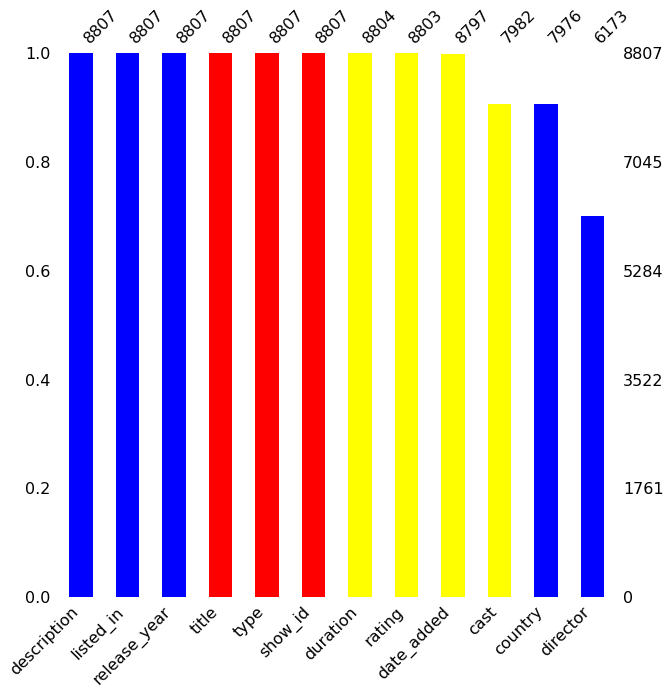

In [6]:
colors = ['Blue','Blue','Blue','Red','Red','Red','yellow','yellow','yellow','yellow','Blue','Blue',]
missingno.bar(df, figsize = (10,10), fontsize= 16, color = colors, sort = 'descending')
#plt.title("Missing Values Visualizations")
plt.show()

In [7]:
# Clearly most of the missing values arise from the director, cast and country

Handling missing data / Menangani data yang hilang

In [9]:
#Filling all missing columns
df['director'] = df['director'].fillna('NoAvailableData') # filling the column with No available data
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('NoAvailableDate')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [10]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoAvailableDate,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NoAvailableData,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NoAvailableData,NoAvailableDate,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NoAvailableData,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NoAvailableData,NoAvailableDate,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
#Checking for duplicate Values
df.duplicated().sum()

0

In [12]:
## No Duplicated Columns

In [13]:
# creating a new column for year and month
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month
df['year'].dtype

dtype('int64')

In [14]:
#Replacing the ratings with categorical values
# first create a dictionary for these categories
ratings_ages= {
    'TV-PG': 'Child',
    'TV-MA': 'Adult',
    'TV-Y7-FV': 'Child',
    'TV-Y7': 'Child',
    'TV-14': 'Adolesent',
    'R': 'Adolecent',
    'TV-Y': 'Infant',
    'NR': 'Adult',
    'PG-13': 'Teen',
    'TV-G': 'Infant',
    'PG': 'Child',
    'G': 'Infant',
    'UR': 'Adult',
    'NC-17': 'Adult'}
df["rating_ages"] = df['rating'].replace(ratings_ages)
df['rating_ages']

0            Teen
1           Adult
2           Adult
3           Adult
4           Adult
          ...    
8802    Adolecent
8803        Child
8804    Adolecent
8805        Child
8806    Adolesent
Name: rating_ages, Length: 8807, dtype: object

In [15]:
#Another way to do this but here you need to convert the column to numeric
#df['year'] = df['date_added'].apply(lambda x : x[-4:])
#df['year'].dtype
#df['year'] = pd.to_numeric(df['year'])

Analysis / Analisis

In [20]:
## How is the content distributed

x = df['type'].value_counts().reset_index()
px.pie(x, values='type', names='index')

Clearly there are more movies that films distributed on these platforms /
Jelas ada lebih banyak film yang didistribusikan film di platform ini

Which countries have the highest number of movies and tv shows / 
Negara mana yang memiliki jumlah film dan acara tv terbanyak?

In [21]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,rating_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoAvailableDate,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teen
1,s2,TV Show,Blood & Water,NoAvailableData,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Adult
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Adult
3,s4,TV Show,Jailbirds New Orleans,NoAvailableData,NoAvailableDate,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Adult
4,s5,TV Show,Kota Factory,NoAvailableData,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,Adolecent
8803,s8804,TV Show,Zombie Dumb,NoAvailableData,NoAvailableDate,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,Child
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,Adolecent
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,Child


In [22]:
countryContent = df.groupby(['type'])['country'].value_counts().head(10)
countryContent = countryContent.to_frame(name = 'Country Content')
countryContent

Country Content
type  country                        
Movie United States              2498
      India                       893
      United Kingdom              206
      Canada                      122
      Spain                        97
      Egypt                        92
      Nigeria                      86
      Indonesia                    77
      Japan                        76
      Turkey                       76

<AxesSubplot:title={'center':'Countries with the highest number of movies and shows'}, xlabel='country', ylabel='type'>

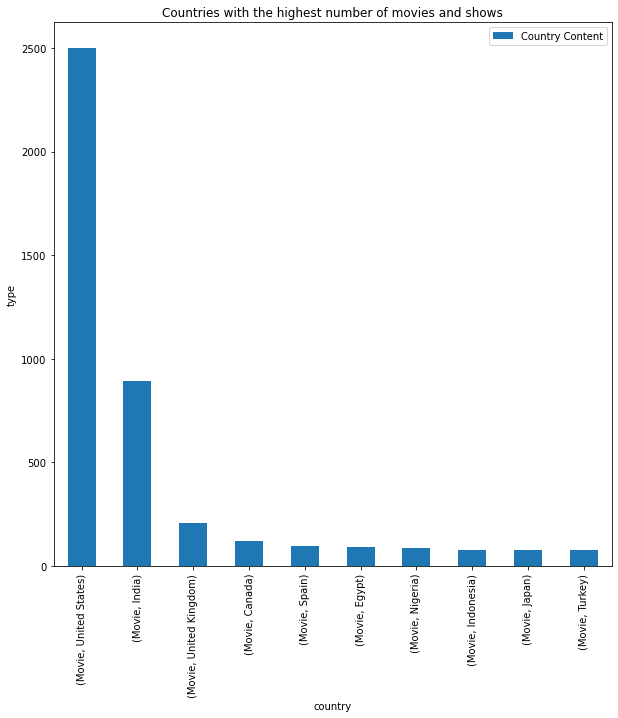

In [23]:
countryContent.plot(figsize = (10,10),kind = 'bar', xlabel = 'country', ylabel = 'type', title = 'Countries with the highest number of movies and shows' )

In [24]:
countryTab = pd.crosstab(df['country'],['type']).sort_values(by = 'type', ascending = True)[-10:].reset_index()
countryTab

col_0,country,type
0,Egypt,106
1,Mexico,110
2,France,124
3,Spain,145
4,Canada,181
5,South Korea,199
6,Japan,245
7,United Kingdom,419
8,India,972
9,United States,3649


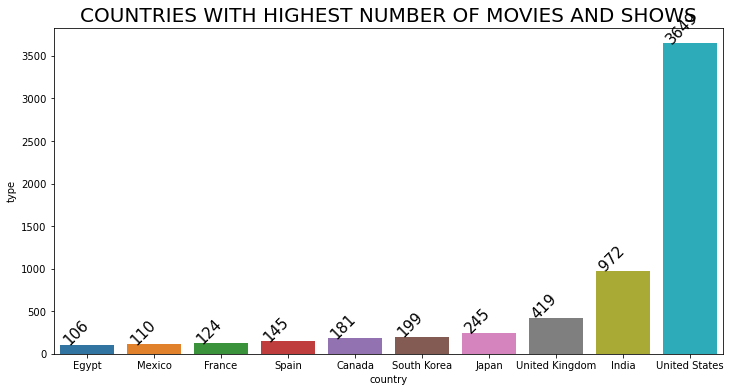

In [25]:
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
plt.figure(figsize=(12,6))
ax=sns.barplot(x=countries["country"],y=countries["type"] )
plt.title("COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS",fontsize=20)

#i = 0
#for patch in ax.patches:
#    ax.text(patch.get_width(), i+patch.get_height()/8, '{:1.0f}'.format(patch.get_width()))
#    i+=1
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(),str(int((i.get_height()))),rotation=45, fontsize=15, color='black')

Solve for countries with the highest numbers of movies alone /
Pecahkan untuk negara-negara dengan jumlah film tertinggi saja

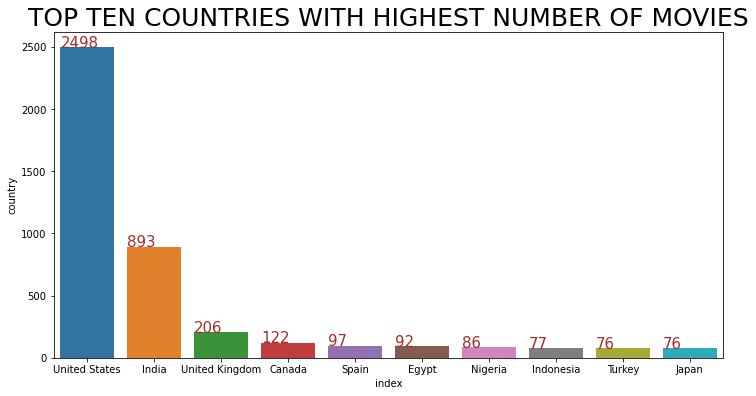

In [26]:
movie=df[df["type"]=="Movie"]
movies=movie["country"].value_counts().reset_index()[0:10]
movies = movies.sort_values(by= 'country', ascending = False)
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES",fontsize=25)
ax=sns.barplot(x="index",y="country", data = movies)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), str(int(i.get_height())), rotation= 0, fontsize=15 , color = 'brown')

In [27]:
#just looking at the movies dataframe here
movies

,index,country
0,United States,2498
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Turkey,76
9,Japan,76


Top ten Countries with the highest number of TV shows / 
Sepuluh Negara dengan jumlah acara TV terbanyak

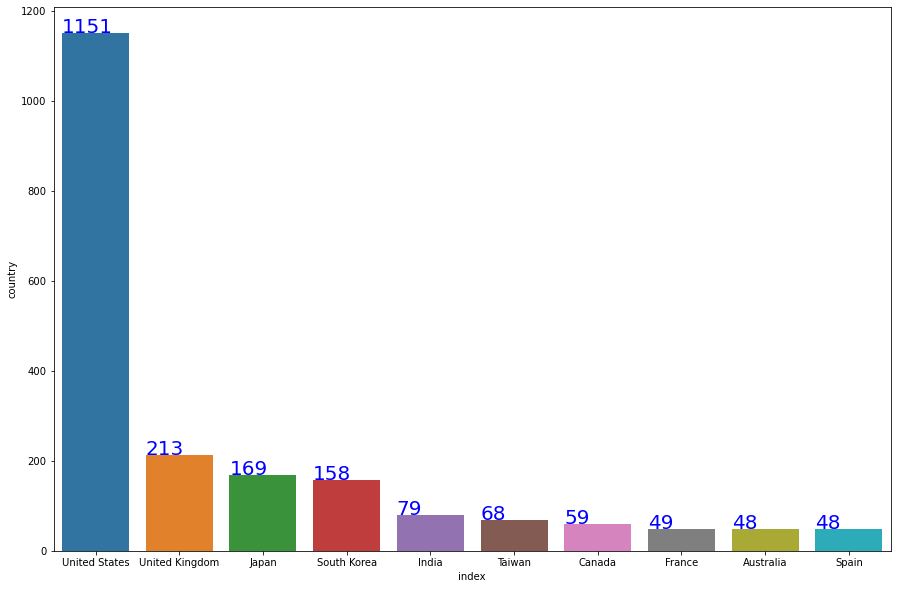

In [28]:
tv = df[df['type']=='TV Show']
television = tv['country'].value_counts().head(10).reset_index()
television
plt.figure(figsize=(15,10))
av = sns.barplot(x=television['index'], y=television['country'])

for i in av.patches:
    av.text(i.get_x(),i.get_height(),str(int(i.get_height())), rotation=0, color = 'Blue', fontsize = 20)

Content added over the years / 
Konten ditambahkan selama bertahun-tahun

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



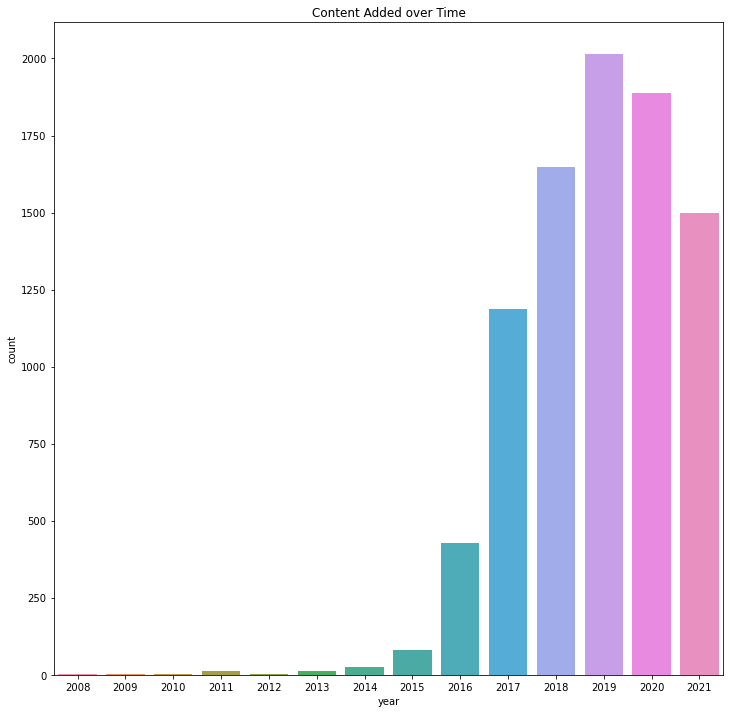

In [29]:
contentYear = df['year'].count()
plt.figure(figsize=(12,12))
sns.countplot(df['year'])
plt.title('Content Added over Time')
plt.show()

Calulating the change in content addition during Covid-19 pandemic / 
Menghitung perubahan penambahan konten selama pandemi Covid-19

In [30]:
## netflix has steadily been adding content over the last 10 year
nineteen = df['year'][df['year']== 2019].count().sum()
twenty = df['year'][df['year']== 2020].count().sum()
content_percent = (((twenty/nineteen)*100) -100)
round(content_percent)

-6

From this we can see that content addition fell by roughly six percent / 
Dari sini kita dapat melihat bahwa penambahan konten turun sekitar enam persen

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



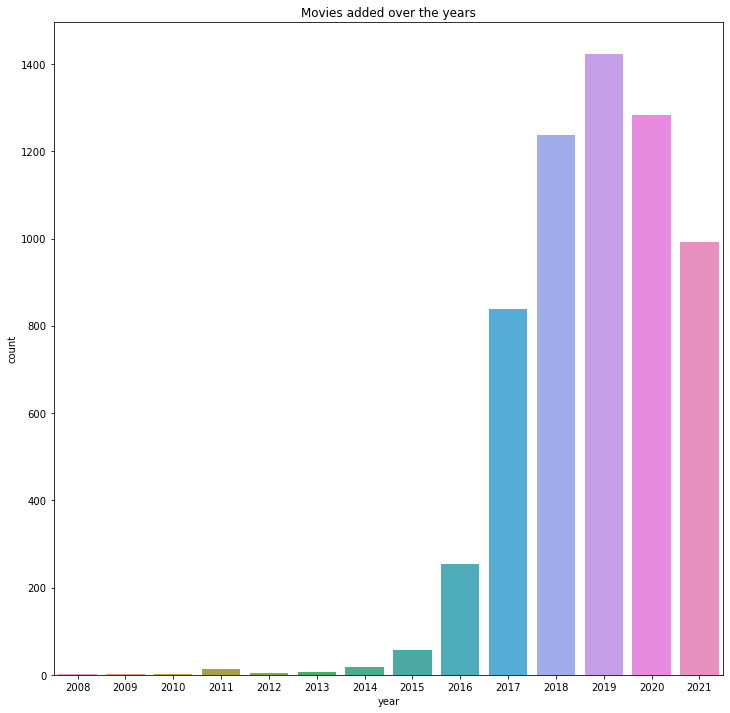

In [31]:
# movies added over the years
movieContent = df[df['type'] == 'Movie']
plt.figure(figsize = (12,12))
a = sns.countplot(movieContent['year'])
plt.title('Movies added over the years')
plt.show()

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



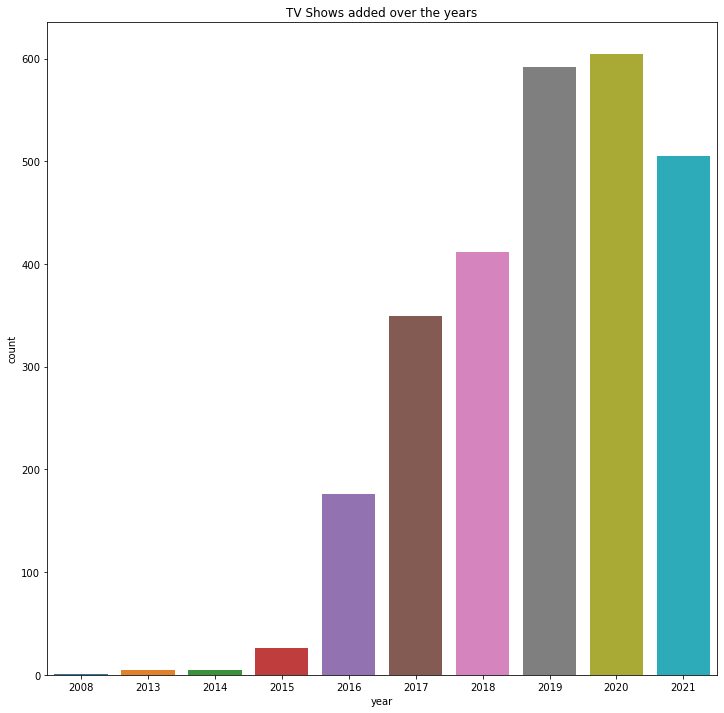

In [32]:
# Tv Shows added over the years
tvContent = df[df['type'] == 'TV Show']
plt.figure(figsize = (12,12))
a = sns.countplot(tvContent['year'])
plt.title('TV Shows added over the years')
plt.show()

During the covid pandemic, more TV shows than movies were added. This could possibly be attributed to the need for longer content to binge during the pandemic / 
Selama pandemi covid, lebih banyak acara TV daripada film yang ditambahkan. Ini mungkin dapat dikaitkan dengan kebutuhan konten yang lebih lama untuk pesta selama pandemi

In [33]:
col1 = df[df['rating_ages']=='74 min' ]
col2 = df[df['rating_ages']=='84 min' ]
col3 = df[df['rating_ages']=='66 min' ]
df.drop([5541,5794,5813], inplace=True)
df.shape

(8804, 15)

In [34]:
px.pie(df, names = 'rating_ages', values = df.index)

Movie Content? / Konten Film?

In [35]:
#movie.drop([5541,5794,5813], inplace=True)
px.pie(movie,names="rating_ages", values=movie.index, title="Type of content present in movies")

TV Content / Konten TV

In [36]:
#tv.drop([5541,5794,5813], inplace=True)
px.pie(tv,names="rating_ages", values=tv.index, title="Type of content present in movies")

In [37]:
# Content Added Over the Years
new = df[['type', 'year']].value_counts().reset_index()
new.columns = ['type', 'year', 'number']
#plt.figure()
px.line(data_frame = new, x = 'year', y ='number', color = 'type', line_group = 'type', range_x = [2005, 2025])
#plt.title('Type of Content Added', fontsize = 20)
#plt.show()